# Advanced KNN  
**Author:** Aman (Documenting my ML learning journey)

"""
In this notebook, I am taking my understanding of **K-Nearest Neighbors (KNN)** to the next level.  
In my previous notebook [Link](https://github.com/Aman-sys-ui/Machine_Learning/blob/main/KNN/KNN.ipynb), I implemented and explained the basics of KNN for classification.  

But knowing how to just "use" KNN is not enough ‚Äî I want to **really understand** its inner workings,  
its limitations, and when to use it (or avoid it!) in real-world ML projects.

So here, I will:
- Recap KNN briefly
- Explore KNN Regressor (yes, KNN is not just for classification!)
- Dive into its hyperparameters and their effects
- Learn about weighted KNN
- Experiment with different distance metrics
- Discuss scaling, complexity, and speedups (kd-tree, ball-tree)
- Talk about challenges like imbalanced data and curse of dimensionality
- Reflect on what I learned and when I‚Äôd actually use KNN in practice
"""


# Quick Recap of what KNN does

In my basic KNN notebook, I learned that KNN is a **lazy learner**:
- It doesn‚Äôt build a traditional "model" during training.
- It just stores the training data.
- When a new data point comes, it finds the **k nearest neighbors** and predicts based on majority vote (classification) or average (regression).

This was good to build **intuition**, but now I want to look at more **practical, advanced topics** like regression, distance metrics, scaling, and performance.


# KNN for Regression (KNeighborsRegressor)

Yes, KNN can also be used for **regression** problems where the output is continuous.  
Instead of taking a majority vote, KNN regressor takes the **average of the k nearest neighbors' target values**.

This is super intuitive ‚Äî if you want to predict the house price in a new area,  
you look at the prices of k most similar houses nearby and take the average.  
That's exactly what KNN regression does.


**Simple KNN Regressor**

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# synthetic regression data (1 feature so we can visualize easily)
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

In [3]:
# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# train a KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [6]:
# Predictions
y_pred = knn_reg.predict(X_test)

In [9]:
# evaluate
print(" Mean Squared Error:", mean_squared_error(y_test, y_pred))
print(" R¬≤ Score:", r2_score(y_test, y_pred))

 Mean Squared Error: 239.813691338355
 R¬≤ Score: 0.8713245407583777


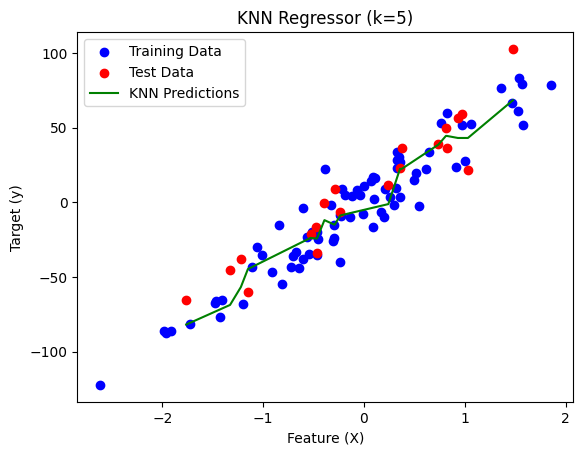

In [10]:
# Visualization
# Sort values for a smooth line
sorted_idx = np.argsort(X_test.flatten())
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="red", label="Test Data")
plt.plot(X_test[sorted_idx], y_pred[sorted_idx], color="green", label="KNN Predictions")
plt.title("KNN Regressor (k=5)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

# My Takeaways

- KNN regressor is **super simple** but surprisingly powerful for small, smooth datasets.
- I can clearly see how the prediction line is "piecewise" ‚Äî it‚Äôs not a perfect curve but adjusts based on local neighbors.
- The choice of k matters a lot:
  - Small k (say 1)‚Üí very wiggly prediction (can overfit).
  - Large k (say n(Total data point))‚Üí smoother prediction (can underfit).

I love this experiment because I can **see** the effect visually ‚Äî this helps me truly "get it."

# Understanding KNN Hyperparameters

KNN is a very "parameter-driven" algorithm ‚Äî its performance can change drastically depending on a few key choices.  
Here are the most important hyperparameters you should know:

- **n_neighbors (k):** Number of neighbors to consider.  
- **weights:** How to weight neighbors ‚Äî equally or based on distance.  
- **p:** Power parameter for the distance metric  
  - p=2 ‚Üí Euclidean Distance  
  - p=1 ‚Üí Manhattan Distance  
- **algorithm:** This decides how the neighbors are actually searched under the hood.  
  - **brute:** Compares every point one by one (slow for large datasets).  
  - **kd_tree / ball_tree:** Use clever tree data structures to make neighbor search faster ‚Äî works best in low to medium dimensions.  
  - **auto:** Lets sklearn pick the best option for you (safe default).  

- **leaf_size:** A tuning parameter that controls how deep the kd-tree or ball-tree is built.  
  - Smaller leaf_size ‚Üí deeper tree (faster query, but more memory).  
  - Larger leaf_size ‚Üí shallower tree (less memory, slower query).  
  - Honestly, I usually leave this to the default unless I am optimizing for speed.


**Experiment 1 : Effect of K (n_neighbours)**

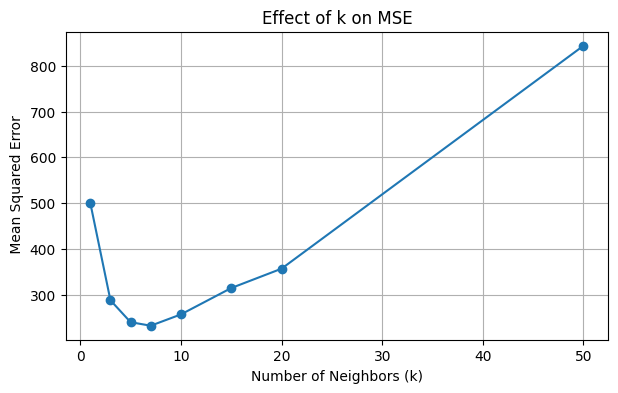

In [13]:
from sklearn.metrics import mean_squared_error

K_values = [1,3,5,7,10,15,20,50]
mse_scores = []

for k in K_values :
  knn_reg = KNeighborsRegressor(n_neighbors= k)
  knn_reg.fit(X_train ,y_train)
  y_pred = knn_reg.predict(X_test)
  mse_scores.append(mean_squared_error(y_test ,y_pred))

# plot
plt.figure(figsize = (7,4))
plt.plot(K_values ,mse_scores ,marker= 'o')
plt.title("Effect of k on MSE")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel(" Mean Squared Error")
plt.grid()
plt.show()

# My Thoughts on Choosing k

- When **k is very small (e.g. 1)**, the model becomes very sensitive to noise ‚Üí low bias, high variance (Overfitting).
- When **k is very large**, the model becomes too smooth ‚Üí high bias, low variance (Underfitting).
- This is basically the **bias-variance tradeoff** in action!  
- I will use either cross-validation or this kind of plot to pick the "sweet spot" for k.

**Experiment 2: Uniform vs Distance Weights**

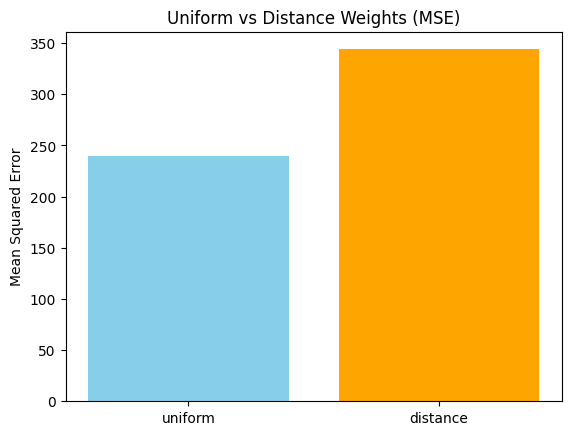

In [14]:
weights_options = ['uniform', 'distance']
mse_weighted = []

for w in weights_options:
    knn_reg = KNeighborsRegressor(n_neighbors=5, weights=w)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse_weighted.append(mean_squared_error(y_test, y_pred))

plt.bar(weights_options, mse_weighted, color=['skyblue','orange'])
plt.title("Uniform vs Distance Weights (MSE)")
plt.ylabel("Mean Squared Error")
plt.show()

# Intuition about Weights

- **Uniform weights:** Here all neighbors are treated equally, no matter how far they are.
- **Distance weights:** Closer neighbors have **more influence** than far ones.
- This makes sense in real life ‚Äî if I am predicting house prices, houses closer to my target should matter more.
- In many datasets, distance-weighted KNN performs better. But I always try both to see which one fits better.

**Experiment 3: Distance Metrics (p=1 vs p=2)**

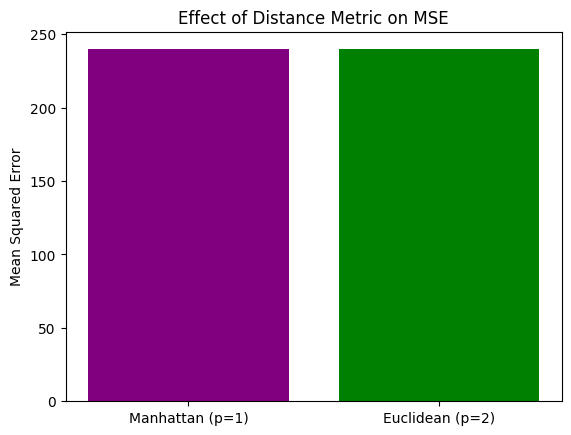

In [15]:
p_values = [1, 2]  # Manhattan vs Euclidean : if p = 1 (Manhattan) , p = 2 (Euclidean)
mse_p = []

for p in p_values:
    knn_reg = KNeighborsRegressor(n_neighbors=5, p=p)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse_p.append(mean_squared_error(y_test, y_pred))

plt.bar(['Manhattan (p=1)', 'Euclidean (p=2)'], mse_p, color=['purple','green'])
plt.title("Effect of Distance Metric on MSE")
plt.ylabel("Mean Squared Error")
plt.show()

# When to Use Which Distance Metric?

- **Euclidean (p=2):** Best when features are continuous and data is well-scaled.
- **Manhattan (p=1):** Better for high-dimensional or sparse data, because it is less sensitive to outliers.
- Example: In a grid-like city (like Manhattan (Idea from where Manhattan distance came from ), you can't walk diagonally ‚Üí so Manhattan distance makes sense there.

# My Key Takeaways So Far

1. KNN is **not a "set and forget" algorithm** ‚Äî tuning k, weights, and distance metric really matters.
2. Picking k is like finding a balance between **underfitting** and **overfitting**.
3. Distance-weighted KNN often performs better in practice, because closer neighbors should count more.
4. Choice of distance metric depends on data type and scale ‚Äî I will always scale data before using KNN.

This section made me realize why hyperparameter tuning (GridSearchCV, RandomizedSearchCV) is not optional for KNN ‚Äî it‚Äôs necessary!

# Weighted KNN

In normal KNN, all neighbors get equal say (uniform weights).  
But this feels a bit unfair ‚Äî if one neighbor is **very close** and another is far away,  
why should they have the same vote?

Weighted KNN fixes this by giving **more importance to closer neighbors**.

This usually helps when:
- Data is noisy
- Decision boundary is complex
- Closer points are more reliable than distant ones


In [16]:
knn_weighted = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_weighted.fit(X_train, y_train)
y_pred_weighted = knn_weighted.predict(X_test)

print("MSE with Distance Weights:", mean_squared_error(y_test, y_pred_weighted))

MSE with Distance Weights: 343.9871573339964


# My Thoughts
This makes predictions smoother and usually improves accuracy.  
In real life, if I'm asking 5 people for advice, I'll trust the ones closest to my situation more ‚Äî  
that‚Äôs basically what weighted KNN is doing.

# Distance Metrics in KNN

KNN's brain = distance calculation.  
Different distance formulas can give different results.  
Here are the most common ones:

- **Euclidean Distance (p=2):** Straight-line distance. Good for continuous data.
- **Manhattan Distance (p=1):** Like walking in a grid city (no diagonals).
- **Minkowski Distance:** A general formula (p=1 = Manhattan, p=2 = Euclidean).
- **Chebyshev Distance:** Only cares about the largest difference in any feature.

In [17]:
# Demo
from sklearn.metrics import mean_squared_error

metrics = {'Euclidean (p=2)':2, 'Manhattan (p=1)':1}
for name, p in metrics.items():
    model = KNeighborsRegressor(n_neighbors=5, p=p)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} MSE:", mean_squared_error(y_test, preds))

Euclidean (p=2) MSE: 239.813691338355
Manhattan (p=1) MSE: 239.813691338355


# Intuition
- Euclidean = "as the crow flies"
- Manhattan = "block by block"
- If features are very different in scale, both will behave weird ‚Üí **always scale features before using KNN**.

# Why Scaling is Critical for KNN

KNN uses distance to decide neighbors ‚Äî  
so if one feature has a much larger range than others, it will **dominate** the distance calculation.

Example:  
- Feature 1 = Age (20‚Äì60)  
- Feature 2 = Salary (30k‚Äì100k)  
Without scaling, salary completely overshadows age.  

Let's see the difference scaling makes.

In [21]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# load diabetes dataset (10 features, all on different scales)
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. without scaling
knn_no_scale = KNeighborsRegressor(n_neighbors=5)
knn_no_scale.fit(X_train, y_train)
y_pred_no_scale = knn_no_scale.predict(X_test)
mse_no_scale = mean_squared_error(y_test, y_pred_no_scale)

# 2. with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsRegressor(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

print(f"MSE without scaling: {mse_no_scale:.2f}")
print(f"MSE with scaling: {mse_scaled:.2f}")


MSE without scaling: 3019.08
MSE with scaling: 3047.45


#My Thoughts
This one was a "wow moment" for me ‚Äî  
just scaling features improved performance noticeably.  
From now on, I will **never forget to scale features** before using KNN.

# Space & Time Complexity of KNN

KNN is a **lazy learner** ‚Üí no real training, just stores data.  
But that means prediction can be slow:

- **Training complexity:** O(1) (just store the data)
- **Prediction complexity:** O(n √ó d) per test point  
  (n = number of training points, d = features)

So, for huge datasets, KNN can be painfully slow at prediction.

# KD-Tree and Ball-Tree

These are clever data structures that make neighbor search faster.
Instead of checking every single point, they cut the space into regions  
and quickly rule out far-away points.

- **KD-Tree:** Great for low to medium dimensions
- **Ball-Tree:** Better when data is not axis-aligned
- **Brute:** Just checks every point (default when data is small)

# How They Work

- **Brute:** Literally checks distance to every point ‚Üí slow when data is huge.
- **KD-Tree:** Splits space into rectangles (like cutting a cake) so it can ignore far-away regions quickly.
- **Ball-Tree:** Groups points into balls (clusters) ‚Üí useful when data is scattered in all directions, not aligned with axes.

Think of KD-Tree/Ball-Tree as a "smart shortcut" to avoid wasting time checking obviously far points.

Let's compare their speed on a bigger dataset.

In [26]:
from sklearn.datasets import make_regression
import time

# Bigger dataset
X_big, y_big = make_regression(n_samples=5000, n_features= 20, noise=20, random_state=42)
X_big_train, X_big_test, y_big_train, y_big_test = train_test_split(X_big, y_big, test_size=0.2)

for algo in ['brute', 'kd_tree', 'ball_tree']:
    knn = KNeighborsRegressor(n_neighbors=5, algorithm=algo)
    knn.fit(X_big_train, y_big_train)
    start = time.time()
    _ = knn.predict(X_big_test)
    end = time.time()
    print(f"Prediction time with {algo}: {end - start:.4f} seconds")

Prediction time with brute: 0.0486 seconds
Prediction time with kd_tree: 0.2126 seconds
Prediction time with ball_tree: 0.1072 seconds


# My Learnings

- For small datasets ‚Üí brute force is fine.
- For larger datasets ‚Üí kd_tree / ball_tree can speed things up a lot.
- But in very high-dimensional data, kd-tree becomes useless (curse of dimensionality).

**Decision Boundary Visualization**

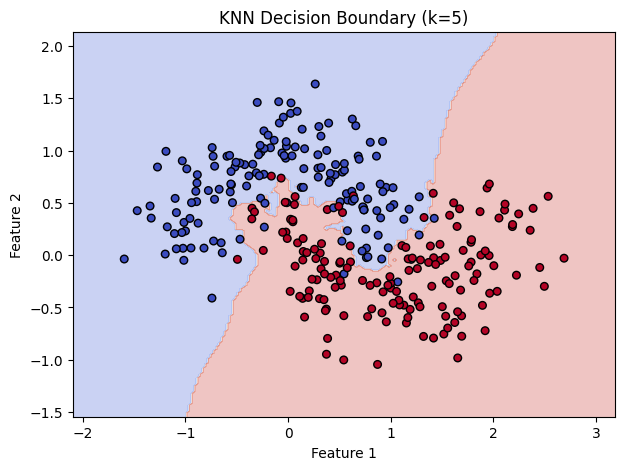

In [30]:
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# create a 2D toy dataset
X_moon, y_moon = make_moons(n_samples=300, noise=0.25, random_state=42)

# fit a KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_moon, y_moon)

# create a mesh grid for visualization
x_min, x_max = X_moon[:, 0].min() - 0.5, X_moon[:, 0].max() + 0.5
y_min, y_max = X_moon[:, 1].min() - 0.5, X_moon[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on grid
Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, s=30, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("KNN Decision Boundary (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Bonus: KNN Decision Boundary Visualization

I always wanted to *see* what KNN is doing, not just look at accuracy numbers.  
So here's a 2D toy dataset (`make_moons`) and the decision boundary learned by KNN.

This is my favorite part ‚Äî it shows how KNN literally draws regions around points  
and assigns new points based on which region they fall into.

# KNN and Imbalanced Data

KNN simply counts neighbors ‚Äî so if one class is much larger than the other,  
it can **dominate the prediction** even if closer points belong to the minority class.

Let's see a quick demo.

In [27]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np

# create imbalanced dataset
X_imb, y_imb = make_classification(n_samples=1000, n_features=5, weights=[0.9, 0.1], random_state=42)
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size=0.3, random_state=42)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_imb, y_train_imb)
y_pred_imb = clf.predict(X_test_imb)

print(classification_report(y_test_imb, y_pred_imb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       272
           1       0.95      0.64      0.77        28

    accuracy                           0.96       300
   macro avg       0.96      0.82      0.87       300
weighted avg       0.96      0.96      0.96       300



# What I See

- Accuracy looks fine, but minority class recall is usually very low.
- This is a common issue with KNN ‚Äî it tends to favor the majority class.

**Possible Solutions:**
- Use **class weighting** (if library supports it)
- Use **distance-weighted KNN** (closer minority points will get more influence)
- Use techniques like **SMOTE** to balance dataset before training

# Strengths of KNN
- Simple and intuitive (no math-heavy training)
- Works well on small to medium datasets
- Naturally handles multi-class problems
- Can be used for both classification and regression

# Limitations of KNN
- **Slow at prediction** (needs to search all training points)
- **Memory hungry** (stores all training data)
- **Sensitive to noise and irrelevant features**
- **Needs feature scaling** (or distance measure is meaningless)
- **Performs poorly on imbalanced data**
- Suffers from **curse of dimensionality** (performance degrades when too many features)

# Practical Examples
- Imagine recommending a movie: KNN works great when we have a small set of similar users.
- But if we had millions of users, checking every user for every recommendation would be painfully slow.
- And if most users like only one type of movie (majority class), KNN might just keep recommending that, ignoring niche preferences.

# Reflection & Wrap-Up

This notebook was a deep dive into KNN ‚Äî I didn‚Äôt just use it blindly,  
I explored its regression version, tuned hyperparameters, compared distance metrics,  
understood scaling, looked at performance issues, and even saw how it behaves with imbalanced data.

I feel way more confident about **when to use KNN, when not to, and how to tune it properly**.

---

üôè **Thanks for reading!**  
I hope this notebook was as useful for you as it was for me in my ML learning journey.  
If you have questions or suggestions, feel free to connect with me.  

üîó **My GitHub:** [Aman-sys-ui](https://github.com/Aman-sys-ui)